# 캐글 산탄데르 고객 만족 예측
----

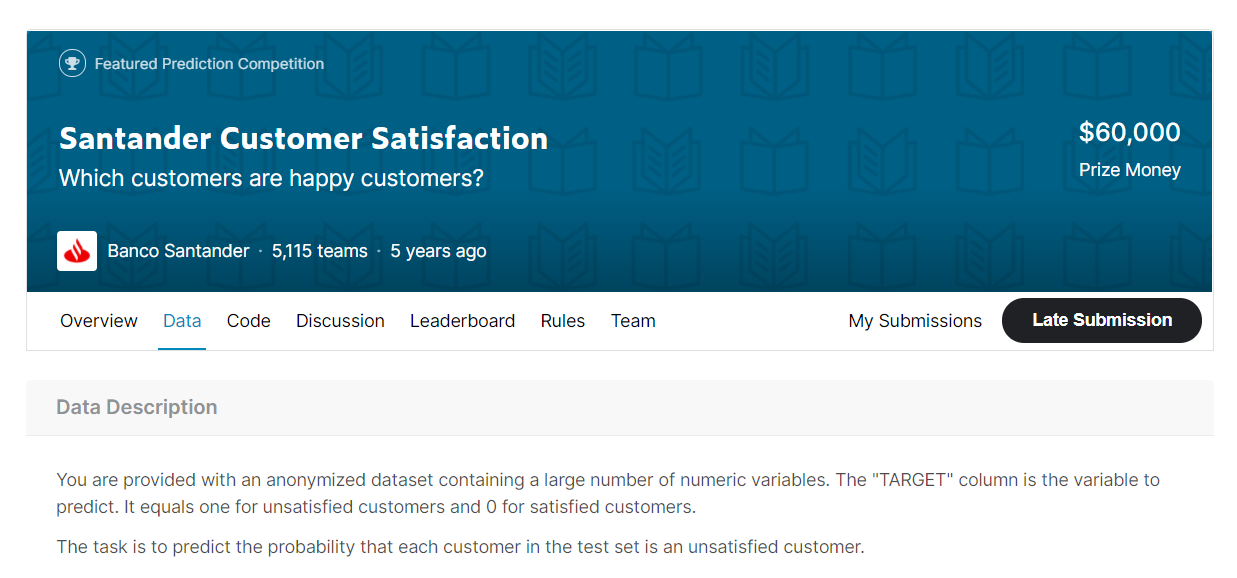

# 데이터 전처리
---

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../data/customer_satisfaction/train.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
# 76020개 행과 371피처로 구성 

df.shape

(76020, 371)

In [5]:
# 111ro 피처가 float, 260개 피처가 int 데이터 타입

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
# 1이면 불만, 0이면 만족

df.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [7]:
# 비율로 확인

df.TARGET.value_counts()/len(df)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

- 0은 만족, 1은 불만족을 뜻하며 불만족에 해당하는 데이터는 약 4%로 데이터 불균형이 심한 상태

In [8]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


- 위 결과를 통해 알 수 있는 것은 현재 var3 피처의 -999999값은 null 값이 대체된 것으로 이해할 수 있습니다. 따라서 이를 최빈값인 2로 대체하도록 합니다.

In [16]:
df['var3'].replace(-999999, 2, inplace=True)
df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리
X_features = df.iloc[:,:-1]
y_label = df.iloc[:,-1]

print(X_features.shape, y_label.shape)

(76020, 369) (76020,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape:{}, 테스트 세트 shape:{}'.format(X_train.shape, X_test.shape))

print('\n 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape:(60816, 369), 테스트 세트 shape:(15204, 369)

 학습 세트 레이블 값 분포 비율
0    0.960389
1    0.039611
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960602
1    0.039398
Name: TARGET, dtype: float64


- 학습, 테스트 데이터 셋 모두 TARGET의 분포가 원본 데이터와 유사하게 분할됨.

# XGBoost
---

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimator는 500으로 설정
xgb_clf = XGBClassifier(n_estimators=500)

# metric은 auc로 지정, 조기중단은 100.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print("ROC AUC : ",xgb_roc_score)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82176	validation_1-auc:0.82436
[1]	validation_0-auc:0.83402	validation_1-auc:0.83181
[2]	validation_0-auc:0.83722	validation_1-auc:0.83149
[3]	validation_0-auc:0.84248	validation_1-auc:0.83543
[4]	validation_0-auc:0.84665	validation_1-auc:0.83721
[5]	validation_0-auc:0.84933	validation_1-auc:0.83963
[6]	validation_0-auc:0.85292	validation_1-auc:0.84048
[7]	validation_0-auc:0.85784	validation_1-auc:0.84114
[8]	validation_0-auc:0.85999	validation_1-auc:0.84029
[9]	validation_0-auc:0.86276	validation_1-auc:0.84161
[10]	validation_0-auc:0.86620	validation_1-auc:0.84199
[11]	validation_0-au

테스트 데이터로 예측 한 ROC AUC는 약 0.84의 값을 가집니다. 

# GridSearchCV with XGBoost
---

In [47]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트 수행 속도 향상을 위해 n_estimator 100으로 지정
xgb_clf = XGBClassifier(n_estimator=100)

params = {
    'max_depth':[5, 7],
    'min_child_weight':[1, 3],
    'colsample_bytree':[0.5, 0.75]
}

# cv = 3
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train), (X_test, y_test)], verbose=20)

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print("ROC AUC : ",xgb_roc_score)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80421	validation_1-auc:0.81236
[20]	validation_0-auc:0.86469	validation_1-auc:0.84429
[40]	validation_0-auc:0.87628	validation_1-auc:0.84457
[54]	validation_0-auc:0.88150	validation_1-auc:0.84331
[21:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]

[20]	validation_0-auc:0.86598	validation_1-auc:0.84900
[40]	validation_0-auc:0.87655	validation_1-auc:0.84685
[44]	validation_0-auc:0.87787	validation_1-auc:0.84593
[21:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80643	validation_1-auc:0.82108
[20]	validation_0-auc:0.86271	validation_1-auc:0.84837
[40]	validation_0-auc:0.87158	validation_1-auc:0.84713
[52]	validation_0-auc:0.87554	validation_1-auc:0.84378
[21:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language b

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}


ROC AUC :  0.8504259352715555

GridSearch를 진행한 결과 ROC AUC가 약 0.01정도 조금 개선되었습니다.

이번에는 앞서 도출된 최적 파라미터를 기반으로 다른 하이퍼 파라미터를 이어서 튜닝하겠습니다. 

이런 식으로 학습 시간이 많이 필요한 모델에 대해 일부 파라미터를 튜닝한 후 최적의 일부 파라미터를 기반으로 튜닝하는 것은 좋은 방법입니다.

In [49]:
# n_estimator를 1000으로 증가, learning rate을 0.02로 감소, reg_alpha = 0.03dmfh cnrk

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=7, colsample_bytree=0.5, min_child_weight=3,
                       reg_alpha=0.03)

# 성능 평가 지표를 auc로 조기 중단 파라미터는 200으로 설정
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)], verbose=50)

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print("ROC AUC : ",xgb_roc_score)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81541	validation_1-auc:0.82287
[50]	validation_0-auc:0.85103	validation_1-auc:0.83850
[100]	validation_0-auc:0.86030	validation_1-auc:0.84043
[150]	validation_0-auc:0.87098	validation_1-auc:0.84316
[200]	validation_0-auc:0.88118	validation_1-auc:0.84594
[250]	validation_0-auc:0.88776	validation_1-auc:0.84688
[300]	validation_0-auc:0.89289	validation_1-auc:0.84918
[350]	validation_0-auc:0.89670	validation_1-auc:0.84989
[400]	validation_0-auc:0.89984	validation_1-auc:0.85067
[450]	validation_0-auc:0.90188	validation_1-auc:0.85094
[500]	validation_0-auc:0.90386	validation_1-auc:0.85123
[550]	validation_0-auc:0.90629	validation_1-auc:0.85118
[600]	validation_0-auc:0.90804	validation_1-auc:0.85114
[650]	validation_0-auc:0.90941	validation_1-auc:0.85098
[698]	validation_0-auc:0.91067	validation_1-auc:0.85059
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC :  0.8504259352715555


위와 같은 방식으로 성능을 점차 개선할 수 있지만 XGBoost가 아무리 GBM보다 빠른 수행 속도를 보인다 하지만 여전히 많은 시간이 요구되는 것은 사실입니다.

# 피처중요도 시각화 - XGBoost
---

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

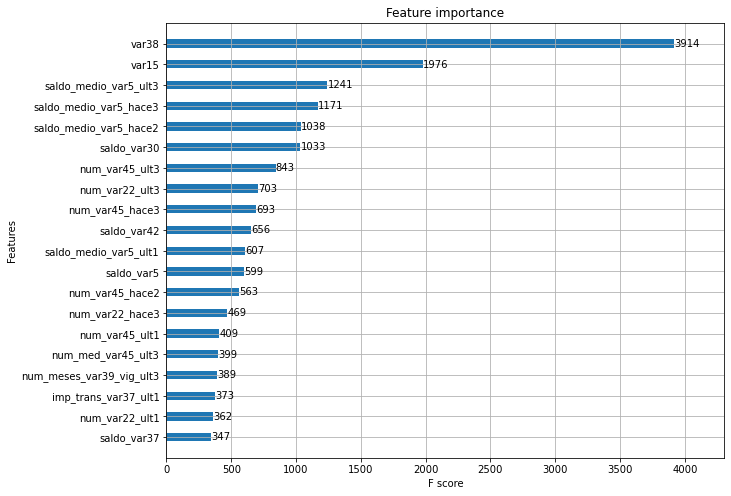

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

위 결과를 통해 고객 만족도를 분류하는 XGBoost의 예측 성능을 좌우하는 피처는 var38과 var15라는 것을 알 수 있습니다.

# LightGBM 모델 학습과 하이퍼 파라미터 튜닝
---

In [54]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,-1], average='macro')

print('ROC AUC: {}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.827951	valid_0's binary_logloss: 0.157932
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.832521	valid_0's binary_logloss: 0.152946
[3]	valid_0's auc: 0.833385	valid_0's binary_logloss: 0.149521
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.146907
[5]	valid_0's auc: 0.840374	valid_0's binary_logloss: 0.144653
[6]	valid_0's auc: 0.842105	valid_0's binary_logloss: 0.142846
[7]	valid_0's auc: 0.84271	valid_0's binary_logloss: 0.141323
[8]	valid_0's auc: 0.843609	valid_0's binary_logloss: 0.140029
[9]	valid_0's auc: 0.844228	valid_0's binary_logloss: 0.138968
[10]	valid_0's auc: 0.843974	valid_0's binary_logloss: 0.13814
[11]	valid_0's auc: 0.843902	valid_0's binary_logloss: 0.137449
[12]	valid_0's auc: 0.843513	valid_0's binary_logloss: 0.13682
[13]	valid_0's auc: 0.843667	valid_0's binary_logloss: 0.136209
[14]	valid_0's auc: 0.844914	valid_0's binary_logloss: 0.135631
[15]	valid_0's auc: 0.844953	valid_0's binary_logloss:

ROC AUC: 0.8471916277214278


LGBM 수행 결과 XGBoost보다 훨씬 단축된 시간으로도 ROC AUC는 약 0.847로 측정됩니다. 

# GridSearchCV with LGBM
---

In [55]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {
    'num_leaves':[32, 64],
    'max_depth':[128, 160],
    'min_child_samples':[60, 100],
    'subsample':[0.8, 1]
}

# cv = 3
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터: ',gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:{}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.82192	valid_0's binary_logloss: 0.158097	valid_1's auc: 0.823672	valid_1's binary_logloss: 0.158019
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827952	valid_0's binary_logloss: 0.152666	valid_1's auc: 0.828604	valid_1's binary_logloss: 0.153067
[3]	valid_0's auc: 0.83523	valid_0's binary_logloss: 0.148822	valid_1's auc: 0.833087	valid_1's binary_logloss: 0.149491
[4]	valid_0's auc: 0.838648	valid_0's binary_logloss: 0.145835	valid_1's auc: 0.835528	valid_1's binary_logloss: 0.146764
[5]	valid_0's auc: 0.842453	valid_0's binary_logloss: 0.143326	valid_1's auc: 0.838118	valid_1's binary_logloss: 0.144539
[6]	valid_0's auc: 0.844698	valid_0's binary_logloss: 0.141295	valid_1's auc: 0.839015	valid_1's binary_logloss: 0.142761
[7]	valid_0's auc: 0.845823	valid_0's binary_logloss: 0.139573	valid_1's auc: 0.839284	valid_1's binary_logloss: 0.141372
[8]	valid_0's auc: 0.846743	valid_0's binary_logloss: 0.138156	valid_1's auc: 0.839435	

[1]	valid_0's auc: 0.821023	valid_0's binary_logloss: 0.15821	valid_1's auc: 0.825137	valid_1's binary_logloss: 0.157695
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829102	valid_0's binary_logloss: 0.152956	valid_1's auc: 0.835258	valid_1's binary_logloss: 0.152698
[3]	valid_0's auc: 0.834367	valid_0's binary_logloss: 0.149127	valid_1's auc: 0.836713	valid_1's binary_logloss: 0.148957
[4]	valid_0's auc: 0.840025	valid_0's binary_logloss: 0.146068	valid_1's auc: 0.840611	valid_1's binary_logloss: 0.146193
[5]	valid_0's auc: 0.844824	valid_0's binary_logloss: 0.143663	valid_1's auc: 0.843461	valid_1's binary_logloss: 0.143964
[6]	valid_0's auc: 0.846678	valid_0's binary_logloss: 0.141609	valid_1's auc: 0.844378	valid_1's binary_logloss: 0.142171
[7]	valid_0's auc: 0.848605	valid_0's binary_logloss: 0.13986	valid_1's auc: 0.843844	valid_1's binary_logloss: 0.140765
[8]	valid_0's auc: 0.850138	valid_0's binary_logloss: 0.138454	valid_1's auc: 0.844769	

[40]	valid_0's auc: 0.876489	valid_0's binary_logloss: 0.123809	valid_1's auc: 0.847397	valid_1's binary_logloss: 0.132137
[41]	valid_0's auc: 0.876981	valid_0's binary_logloss: 0.123627	valid_1's auc: 0.847711	valid_1's binary_logloss: 0.132057
[42]	valid_0's auc: 0.877435	valid_0's binary_logloss: 0.123444	valid_1's auc: 0.848101	valid_1's binary_logloss: 0.131989
[43]	valid_0's auc: 0.877957	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.847467	valid_1's binary_logloss: 0.13209
[44]	valid_0's auc: 0.878323	valid_0's binary_logloss: 0.123072	valid_1's auc: 0.847418	valid_1's binary_logloss: 0.132087
[45]	valid_0's auc: 0.878589	valid_0's binary_logloss: 0.122901	valid_1's auc: 0.847227	valid_1's binary_logloss: 0.132084
[46]	valid_0's auc: 0.879004	valid_0's binary_logloss: 0.122726	valid_1's auc: 0.847101	valid_1's binary_logloss: 0.132072
[47]	valid_0's auc: 0.879505	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.847271	valid_1's binary_logloss: 0.132018
[48]	valid_0's au

[64]	valid_0's auc: 0.888531	valid_0's binary_logloss: 0.119118	valid_1's auc: 0.845181	valid_1's binary_logloss: 0.132954
[65]	valid_0's auc: 0.888809	valid_0's binary_logloss: 0.119005	valid_1's auc: 0.84508	valid_1's binary_logloss: 0.132971
[66]	valid_0's auc: 0.88893	valid_0's binary_logloss: 0.118886	valid_1's auc: 0.845311	valid_1's binary_logloss: 0.132943
[67]	valid_0's auc: 0.889405	valid_0's binary_logloss: 0.118756	valid_1's auc: 0.845228	valid_1's binary_logloss: 0.132962
[68]	valid_0's auc: 0.889656	valid_0's binary_logloss: 0.118623	valid_1's auc: 0.845086	valid_1's binary_logloss: 0.132983
[69]	valid_0's auc: 0.889938	valid_0's binary_logloss: 0.118466	valid_1's auc: 0.845031	valid_1's binary_logloss: 0.132997
Early stopping, best iteration is:
[39]	valid_0's auc: 0.878636	valid_0's binary_logloss: 0.123539	valid_1's auc: 0.846454	valid_1's binary_logloss: 0.132588
[1]	valid_0's auc: 0.821023	valid_0's binary_logloss: 0.15821	valid_1's auc: 0.825137	valid_1's binary_log

[23]	valid_0's auc: 0.864764	valid_0's binary_logloss: 0.128228	valid_1's auc: 0.848447	valid_1's binary_logloss: 0.132664
[24]	valid_0's auc: 0.865971	valid_0's binary_logloss: 0.127846	valid_1's auc: 0.848384	valid_1's binary_logloss: 0.132615
[25]	valid_0's auc: 0.866607	valid_0's binary_logloss: 0.127527	valid_1's auc: 0.848337	valid_1's binary_logloss: 0.132511
[26]	valid_0's auc: 0.867354	valid_0's binary_logloss: 0.127192	valid_1's auc: 0.848115	valid_1's binary_logloss: 0.13244
[27]	valid_0's auc: 0.867784	valid_0's binary_logloss: 0.126903	valid_1's auc: 0.84768	valid_1's binary_logloss: 0.132438
[28]	valid_0's auc: 0.868623	valid_0's binary_logloss: 0.126636	valid_1's auc: 0.847619	valid_1's binary_logloss: 0.132409
[29]	valid_0's auc: 0.869378	valid_0's binary_logloss: 0.126333	valid_1's auc: 0.848035	valid_1's binary_logloss: 0.132341
[30]	valid_0's auc: 0.870142	valid_0's binary_logloss: 0.126088	valid_1's auc: 0.848388	valid_1's binary_logloss: 0.132225
[31]	valid_0's auc

[44]	valid_0's auc: 0.899458	valid_0's binary_logloss: 0.115063	valid_1's auc: 0.837592	valid_1's binary_logloss: 0.134831
[45]	valid_0's auc: 0.899807	valid_0's binary_logloss: 0.114771	valid_1's auc: 0.837519	valid_1's binary_logloss: 0.134851
[46]	valid_0's auc: 0.900133	valid_0's binary_logloss: 0.114534	valid_1's auc: 0.837228	valid_1's binary_logloss: 0.134908
[47]	valid_0's auc: 0.900713	valid_0's binary_logloss: 0.114171	valid_1's auc: 0.836884	valid_1's binary_logloss: 0.134984
[48]	valid_0's auc: 0.900985	valid_0's binary_logloss: 0.113959	valid_1's auc: 0.836912	valid_1's binary_logloss: 0.135014
[49]	valid_0's auc: 0.901428	valid_0's binary_logloss: 0.113667	valid_1's auc: 0.836535	valid_1's binary_logloss: 0.135099
[50]	valid_0's auc: 0.901866	valid_0's binary_logloss: 0.11338	valid_1's auc: 0.836452	valid_1's binary_logloss: 0.135144
[51]	valid_0's auc: 0.902414	valid_0's binary_logloss: 0.113062	valid_1's auc: 0.83637	valid_1's binary_logloss: 0.135186
[52]	valid_0's auc

[45]	valid_0's auc: 0.900699	valid_0's binary_logloss: 0.114198	valid_1's auc: 0.84512	valid_1's binary_logloss: 0.133282
[46]	valid_0's auc: 0.901592	valid_0's binary_logloss: 0.113876	valid_1's auc: 0.844717	valid_1's binary_logloss: 0.133389
[47]	valid_0's auc: 0.902032	valid_0's binary_logloss: 0.113603	valid_1's auc: 0.844817	valid_1's binary_logloss: 0.133375
[48]	valid_0's auc: 0.902104	valid_0's binary_logloss: 0.113395	valid_1's auc: 0.844535	valid_1's binary_logloss: 0.133458
[49]	valid_0's auc: 0.903087	valid_0's binary_logloss: 0.113112	valid_1's auc: 0.844604	valid_1's binary_logloss: 0.133446
[50]	valid_0's auc: 0.903553	valid_0's binary_logloss: 0.112891	valid_1's auc: 0.844293	valid_1's binary_logloss: 0.133532
[51]	valid_0's auc: 0.903868	valid_0's binary_logloss: 0.112693	valid_1's auc: 0.844193	valid_1's binary_logloss: 0.133537
[52]	valid_0's auc: 0.904547	valid_0's binary_logloss: 0.11239	valid_1's auc: 0.843881	valid_1's binary_logloss: 0.133597
[53]	valid_0's auc

[1]	valid_0's auc: 0.826369	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.813403	valid_1's binary_logloss: 0.158075
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.83856	valid_0's binary_logloss: 0.151511	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.153038
[3]	valid_0's auc: 0.844575	valid_0's binary_logloss: 0.147304	valid_1's auc: 0.833025	valid_1's binary_logloss: 0.149619
[4]	valid_0's auc: 0.8473	valid_0's binary_logloss: 0.144037	valid_1's auc: 0.834339	valid_1's binary_logloss: 0.146957
[5]	valid_0's auc: 0.852074	valid_0's binary_logloss: 0.141359	valid_1's auc: 0.83525	valid_1's binary_logloss: 0.144792
[6]	valid_0's auc: 0.854633	valid_0's binary_logloss: 0.139137	valid_1's auc: 0.837082	valid_1's binary_logloss: 0.142986
[7]	valid_0's auc: 0.857831	valid_0's binary_logloss: 0.137104	valid_1's auc: 0.837496	valid_1's binary_logloss: 0.141615
[8]	valid_0's auc: 0.859647	valid_0's binary_logloss: 0.135439	valid_1's auc: 0.837546	va

[18]	valid_0's auc: 0.875935	valid_0's binary_logloss: 0.125855	valid_1's auc: 0.841944	valid_1's binary_logloss: 0.134654
[19]	valid_0's auc: 0.878256	valid_0's binary_logloss: 0.125041	valid_1's auc: 0.842835	valid_1's binary_logloss: 0.13439
[20]	valid_0's auc: 0.879796	valid_0's binary_logloss: 0.124375	valid_1's auc: 0.84365	valid_1's binary_logloss: 0.134147
[21]	valid_0's auc: 0.880981	valid_0's binary_logloss: 0.123805	valid_1's auc: 0.844196	valid_1's binary_logloss: 0.134001
[22]	valid_0's auc: 0.882	valid_0's binary_logloss: 0.12321	valid_1's auc: 0.843698	valid_1's binary_logloss: 0.134014
[23]	valid_0's auc: 0.88297	valid_0's binary_logloss: 0.122674	valid_1's auc: 0.843369	valid_1's binary_logloss: 0.133876
[24]	valid_0's auc: 0.88424	valid_0's binary_logloss: 0.122132	valid_1's auc: 0.842762	valid_1's binary_logloss: 0.133887
[25]	valid_0's auc: 0.884928	valid_0's binary_logloss: 0.121647	valid_1's auc: 0.842976	valid_1's binary_logloss: 0.133771
[26]	valid_0's auc: 0.88

[18]	valid_0's auc: 0.874848	valid_0's binary_logloss: 0.125934	valid_1's auc: 0.840179	valid_1's binary_logloss: 0.134742
[19]	valid_0's auc: 0.876134	valid_0's binary_logloss: 0.125324	valid_1's auc: 0.839125	valid_1's binary_logloss: 0.13463
[20]	valid_0's auc: 0.876829	valid_0's binary_logloss: 0.124794	valid_1's auc: 0.839104	valid_1's binary_logloss: 0.134512
[21]	valid_0's auc: 0.877743	valid_0's binary_logloss: 0.124282	valid_1's auc: 0.83956	valid_1's binary_logloss: 0.134324
[22]	valid_0's auc: 0.878501	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839109	valid_1's binary_logloss: 0.134314
[23]	valid_0's auc: 0.879376	valid_0's binary_logloss: 0.12326	valid_1's auc: 0.83913	valid_1's binary_logloss: 0.134275
[24]	valid_0's auc: 0.880532	valid_0's binary_logloss: 0.122761	valid_1's auc: 0.839338	valid_1's binary_logloss: 0.134187
[25]	valid_0's auc: 0.881505	valid_0's binary_logloss: 0.122317	valid_1's auc: 0.839581	valid_1's binary_logloss: 0.134096
[26]	valid_0's auc: 

[43]	valid_0's auc: 0.878852	valid_0's binary_logloss: 0.123438	valid_1's auc: 0.842908	valid_1's binary_logloss: 0.133493
[44]	valid_0's auc: 0.879385	valid_0's binary_logloss: 0.123241	valid_1's auc: 0.842484	valid_1's binary_logloss: 0.133574
[45]	valid_0's auc: 0.880011	valid_0's binary_logloss: 0.123004	valid_1's auc: 0.842438	valid_1's binary_logloss: 0.133592
[46]	valid_0's auc: 0.88047	valid_0's binary_logloss: 0.122816	valid_1's auc: 0.842582	valid_1's binary_logloss: 0.13363
[47]	valid_0's auc: 0.880905	valid_0's binary_logloss: 0.1226	valid_1's auc: 0.842278	valid_1's binary_logloss: 0.133671
[48]	valid_0's auc: 0.881202	valid_0's binary_logloss: 0.122443	valid_1's auc: 0.842161	valid_1's binary_logloss: 0.133691
[49]	valid_0's auc: 0.881631	valid_0's binary_logloss: 0.122273	valid_1's auc: 0.841892	valid_1's binary_logloss: 0.133784
[50]	valid_0's auc: 0.882212	valid_0's binary_logloss: 0.122037	valid_1's auc: 0.841724	valid_1's binary_logloss: 0.133854
[51]	valid_0's auc: 

[1]	valid_0's auc: 0.82124	valid_0's binary_logloss: 0.157986	valid_1's auc: 0.82554	valid_1's binary_logloss: 0.157923
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828646	valid_0's binary_logloss: 0.152703	valid_1's auc: 0.831374	valid_1's binary_logloss: 0.153137
[3]	valid_0's auc: 0.83509	valid_0's binary_logloss: 0.148978	valid_1's auc: 0.836114	valid_1's binary_logloss: 0.149674
[4]	valid_0's auc: 0.837478	valid_0's binary_logloss: 0.14597	valid_1's auc: 0.837699	valid_1's binary_logloss: 0.146895
[5]	valid_0's auc: 0.840153	valid_0's binary_logloss: 0.143597	valid_1's auc: 0.839311	valid_1's binary_logloss: 0.144628
[6]	valid_0's auc: 0.843263	valid_0's binary_logloss: 0.141597	valid_1's auc: 0.840634	valid_1's binary_logloss: 0.14277
[7]	valid_0's auc: 0.844969	valid_0's binary_logloss: 0.139992	valid_1's auc: 0.841157	valid_1's binary_logloss: 0.141315
[8]	valid_0's auc: 0.846185	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.841736	val

[24]	valid_0's auc: 0.865758	valid_0's binary_logloss: 0.128278	valid_1's auc: 0.844066	valid_1's binary_logloss: 0.133781
[25]	valid_0's auc: 0.86665	valid_0's binary_logloss: 0.127915	valid_1's auc: 0.843952	valid_1's binary_logloss: 0.133701
[26]	valid_0's auc: 0.867526	valid_0's binary_logloss: 0.12757	valid_1's auc: 0.844256	valid_1's binary_logloss: 0.133598
[27]	valid_0's auc: 0.868549	valid_0's binary_logloss: 0.127222	valid_1's auc: 0.844038	valid_1's binary_logloss: 0.133595
[28]	valid_0's auc: 0.869521	valid_0's binary_logloss: 0.12694	valid_1's auc: 0.844145	valid_1's binary_logloss: 0.133508
[29]	valid_0's auc: 0.870035	valid_0's binary_logloss: 0.126691	valid_1's auc: 0.843914	valid_1's binary_logloss: 0.133506
[30]	valid_0's auc: 0.870604	valid_0's binary_logloss: 0.126441	valid_1's auc: 0.843729	valid_1's binary_logloss: 0.133502
[31]	valid_0's auc: 0.871373	valid_0's binary_logloss: 0.126195	valid_1's auc: 0.844181	valid_1's binary_logloss: 0.133422
[32]	valid_0's auc:

[41]	valid_0's auc: 0.877442	valid_0's binary_logloss: 0.124154	valid_1's auc: 0.844123	valid_1's binary_logloss: 0.132686
[42]	valid_0's auc: 0.878078	valid_0's binary_logloss: 0.123914	valid_1's auc: 0.844028	valid_1's binary_logloss: 0.132678
[43]	valid_0's auc: 0.878423	valid_0's binary_logloss: 0.123739	valid_1's auc: 0.844184	valid_1's binary_logloss: 0.13268
[44]	valid_0's auc: 0.878855	valid_0's binary_logloss: 0.123531	valid_1's auc: 0.844176	valid_1's binary_logloss: 0.132721
[45]	valid_0's auc: 0.879578	valid_0's binary_logloss: 0.123321	valid_1's auc: 0.843832	valid_1's binary_logloss: 0.13278
Early stopping, best iteration is:
[15]	valid_0's auc: 0.857432	valid_0's binary_logloss: 0.132641	valid_1's auc: 0.84431	valid_1's binary_logloss: 0.135328
[1]	valid_0's auc: 0.82124	valid_0's binary_logloss: 0.157986	valid_1's auc: 0.82554	valid_1's binary_logloss: 0.157923
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828646	valid_0's binary_logl

[17]	valid_0's auc: 0.873328	valid_0's binary_logloss: 0.127559	valid_1's auc: 0.838672	valid_1's binary_logloss: 0.135714
[18]	valid_0's auc: 0.874503	valid_0's binary_logloss: 0.126908	valid_1's auc: 0.838631	valid_1's binary_logloss: 0.135468
[19]	valid_0's auc: 0.876001	valid_0's binary_logloss: 0.126304	valid_1's auc: 0.839186	valid_1's binary_logloss: 0.135212
[20]	valid_0's auc: 0.877157	valid_0's binary_logloss: 0.125678	valid_1's auc: 0.839097	valid_1's binary_logloss: 0.13508
[21]	valid_0's auc: 0.878314	valid_0's binary_logloss: 0.125143	valid_1's auc: 0.83919	valid_1's binary_logloss: 0.134942
[22]	valid_0's auc: 0.879477	valid_0's binary_logloss: 0.124584	valid_1's auc: 0.838695	valid_1's binary_logloss: 0.134962
[23]	valid_0's auc: 0.880787	valid_0's binary_logloss: 0.124047	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.134954
[24]	valid_0's auc: 0.881932	valid_0's binary_logloss: 0.123538	valid_1's auc: 0.838867	valid_1's binary_logloss: 0.13485
[25]	valid_0's auc:

[27]	valid_0's auc: 0.885346	valid_0's binary_logloss: 0.122213	valid_1's auc: 0.841144	valid_1's binary_logloss: 0.133656
[28]	valid_0's auc: 0.886222	valid_0's binary_logloss: 0.121791	valid_1's auc: 0.840547	valid_1's binary_logloss: 0.133635
[29]	valid_0's auc: 0.887248	valid_0's binary_logloss: 0.121342	valid_1's auc: 0.841044	valid_1's binary_logloss: 0.133566
[30]	valid_0's auc: 0.888077	valid_0's binary_logloss: 0.120982	valid_1's auc: 0.841282	valid_1's binary_logloss: 0.133464
[31]	valid_0's auc: 0.888643	valid_0's binary_logloss: 0.1206	valid_1's auc: 0.841434	valid_1's binary_logloss: 0.133426
[32]	valid_0's auc: 0.889351	valid_0's binary_logloss: 0.1202	valid_1's auc: 0.841648	valid_1's binary_logloss: 0.133333
[33]	valid_0's auc: 0.890175	valid_0's binary_logloss: 0.119806	valid_1's auc: 0.841402	valid_1's binary_logloss: 0.133391
[34]	valid_0's auc: 0.891418	valid_0's binary_logloss: 0.1194	valid_1's auc: 0.841458	valid_1's binary_logloss: 0.133375
[35]	valid_0's auc: 0.

[29]	valid_0's auc: 0.883774	valid_0's binary_logloss: 0.121682	valid_1's auc: 0.841592	valid_1's binary_logloss: 0.133436
[30]	valid_0's auc: 0.884838	valid_0's binary_logloss: 0.121297	valid_1's auc: 0.841465	valid_1's binary_logloss: 0.133442
[31]	valid_0's auc: 0.885598	valid_0's binary_logloss: 0.120917	valid_1's auc: 0.840495	valid_1's binary_logloss: 0.133553
[32]	valid_0's auc: 0.886167	valid_0's binary_logloss: 0.120601	valid_1's auc: 0.840715	valid_1's binary_logloss: 0.133563
[33]	valid_0's auc: 0.886695	valid_0's binary_logloss: 0.120314	valid_1's auc: 0.839962	valid_1's binary_logloss: 0.133655
[34]	valid_0's auc: 0.887833	valid_0's binary_logloss: 0.119994	valid_1's auc: 0.84069	valid_1's binary_logloss: 0.133584
[35]	valid_0's auc: 0.888409	valid_0's binary_logloss: 0.119682	valid_1's auc: 0.840525	valid_1's binary_logloss: 0.133644
[36]	valid_0's auc: 0.889235	valid_0's binary_logloss: 0.119291	valid_1's auc: 0.840483	valid_1's binary_logloss: 0.133744
[37]	valid_0's au

[58]	valid_0's auc: 0.902008	valid_0's binary_logloss: 0.112962	valid_1's auc: 0.835411	valid_1's binary_logloss: 0.135886
[59]	valid_0's auc: 0.902085	valid_0's binary_logloss: 0.112805	valid_1's auc: 0.835432	valid_1's binary_logloss: 0.135897
[60]	valid_0's auc: 0.902406	valid_0's binary_logloss: 0.112593	valid_1's auc: 0.835347	valid_1's binary_logloss: 0.135943
Early stopping, best iteration is:
[30]	valid_0's auc: 0.887579	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.839399	valid_1's binary_logloss: 0.134471
[1]	valid_0's auc: 0.833804	valid_0's binary_logloss: 0.157933	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.15776
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840322	valid_0's binary_logloss: 0.152264	valid_1's auc: 0.8292	valid_1's binary_logloss: 0.15316
[3]	valid_0's auc: 0.8432	valid_0's binary_logloss: 0.148176	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.149264
[4]	valid_0's auc: 0.849113	valid_0's binary_logloss

[1]	valid_0's auc: 0.832343	valid_0's binary_logloss: 0.15736	valid_1's auc: 0.827468	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841183	valid_0's binary_logloss: 0.151618	valid_1's auc: 0.831767	valid_1's binary_logloss: 0.152902
[3]	valid_0's auc: 0.846113	valid_0's binary_logloss: 0.147537	valid_1's auc: 0.833589	valid_1's binary_logloss: 0.149356
[4]	valid_0's auc: 0.85065	valid_0's binary_logloss: 0.144284	valid_1's auc: 0.838341	valid_1's binary_logloss: 0.146383
[5]	valid_0's auc: 0.852906	valid_0's binary_logloss: 0.14168	valid_1's auc: 0.840014	valid_1's binary_logloss: 0.144205
[6]	valid_0's auc: 0.855227	valid_0's binary_logloss: 0.139572	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.142412
[7]	valid_0's auc: 0.857302	valid_0's binary_logloss: 0.137709	valid_1's auc: 0.839603	valid_1's binary_logloss: 0.141064
[8]	valid_0's auc: 0.858783	valid_0's binary_logloss: 0.136181	valid_1's auc: 0.83846	val

[24]	valid_0's auc: 0.867433	valid_0's binary_logloss: 0.127669	valid_1's auc: 0.844039	valid_1's binary_logloss: 0.133673
[25]	valid_0's auc: 0.868498	valid_0's binary_logloss: 0.127316	valid_1's auc: 0.8442	valid_1's binary_logloss: 0.133517
[26]	valid_0's auc: 0.869076	valid_0's binary_logloss: 0.127006	valid_1's auc: 0.844189	valid_1's binary_logloss: 0.133445
[27]	valid_0's auc: 0.870132	valid_0's binary_logloss: 0.126695	valid_1's auc: 0.844509	valid_1's binary_logloss: 0.133316
[28]	valid_0's auc: 0.870776	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.844707	valid_1's binary_logloss: 0.133244
[29]	valid_0's auc: 0.871454	valid_0's binary_logloss: 0.126144	valid_1's auc: 0.84529	valid_1's binary_logloss: 0.133105
[30]	valid_0's auc: 0.872253	valid_0's binary_logloss: 0.125863	valid_1's auc: 0.845433	valid_1's binary_logloss: 0.133042
[31]	valid_0's auc: 0.872793	valid_0's binary_logloss: 0.125573	valid_1's auc: 0.845488	valid_1's binary_logloss: 0.132996
[32]	valid_0's auc:

[23]	valid_0's auc: 0.866634	valid_0's binary_logloss: 0.128113	valid_1's auc: 0.844551	valid_1's binary_logloss: 0.13311
[24]	valid_0's auc: 0.867115	valid_0's binary_logloss: 0.1278	valid_1's auc: 0.844501	valid_1's binary_logloss: 0.132997
[25]	valid_0's auc: 0.867589	valid_0's binary_logloss: 0.127444	valid_1's auc: 0.844543	valid_1's binary_logloss: 0.132868
[26]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.127104	valid_1's auc: 0.845126	valid_1's binary_logloss: 0.13276
[27]	valid_0's auc: 0.869692	valid_0's binary_logloss: 0.126816	valid_1's auc: 0.844342	valid_1's binary_logloss: 0.132731
[28]	valid_0's auc: 0.870615	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.844357	valid_1's binary_logloss: 0.132713
[29]	valid_0's auc: 0.871818	valid_0's binary_logloss: 0.126147	valid_1's auc: 0.844443	valid_1's binary_logloss: 0.132685
[30]	valid_0's auc: 0.872572	valid_0's binary_logloss: 0.125826	valid_1's auc: 0.844223	valid_1's binary_logloss: 0.132653
[31]	valid_0's auc: 

[1]	valid_0's auc: 0.82192	valid_0's binary_logloss: 0.158097	valid_1's auc: 0.823672	valid_1's binary_logloss: 0.158019
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827952	valid_0's binary_logloss: 0.152666	valid_1's auc: 0.828604	valid_1's binary_logloss: 0.153067
[3]	valid_0's auc: 0.83523	valid_0's binary_logloss: 0.148822	valid_1's auc: 0.833087	valid_1's binary_logloss: 0.149491
[4]	valid_0's auc: 0.838648	valid_0's binary_logloss: 0.145835	valid_1's auc: 0.835528	valid_1's binary_logloss: 0.146764
[5]	valid_0's auc: 0.842453	valid_0's binary_logloss: 0.143326	valid_1's auc: 0.838118	valid_1's binary_logloss: 0.144539
[6]	valid_0's auc: 0.844698	valid_0's binary_logloss: 0.141295	valid_1's auc: 0.839015	valid_1's binary_logloss: 0.142761
[7]	valid_0's auc: 0.845823	valid_0's binary_logloss: 0.139573	valid_1's auc: 0.839284	valid_1's binary_logloss: 0.141372
[8]	valid_0's auc: 0.846743	valid_0's binary_logloss: 0.138156	valid_1's auc: 0.839435	

[1]	valid_0's auc: 0.821023	valid_0's binary_logloss: 0.15821	valid_1's auc: 0.825137	valid_1's binary_logloss: 0.157695
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829102	valid_0's binary_logloss: 0.152956	valid_1's auc: 0.835258	valid_1's binary_logloss: 0.152698
[3]	valid_0's auc: 0.834367	valid_0's binary_logloss: 0.149127	valid_1's auc: 0.836713	valid_1's binary_logloss: 0.148957
[4]	valid_0's auc: 0.840025	valid_0's binary_logloss: 0.146068	valid_1's auc: 0.840611	valid_1's binary_logloss: 0.146193
[5]	valid_0's auc: 0.844824	valid_0's binary_logloss: 0.143663	valid_1's auc: 0.843461	valid_1's binary_logloss: 0.143964
[6]	valid_0's auc: 0.846678	valid_0's binary_logloss: 0.141609	valid_1's auc: 0.844378	valid_1's binary_logloss: 0.142171
[7]	valid_0's auc: 0.848605	valid_0's binary_logloss: 0.13986	valid_1's auc: 0.843844	valid_1's binary_logloss: 0.140765
[8]	valid_0's auc: 0.850138	valid_0's binary_logloss: 0.138454	valid_1's auc: 0.844769	

[42]	valid_0's auc: 0.877435	valid_0's binary_logloss: 0.123444	valid_1's auc: 0.848101	valid_1's binary_logloss: 0.131989
[43]	valid_0's auc: 0.877957	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.847467	valid_1's binary_logloss: 0.13209
[44]	valid_0's auc: 0.878323	valid_0's binary_logloss: 0.123072	valid_1's auc: 0.847418	valid_1's binary_logloss: 0.132087
[45]	valid_0's auc: 0.878589	valid_0's binary_logloss: 0.122901	valid_1's auc: 0.847227	valid_1's binary_logloss: 0.132084
[46]	valid_0's auc: 0.879004	valid_0's binary_logloss: 0.122726	valid_1's auc: 0.847101	valid_1's binary_logloss: 0.132072
[47]	valid_0's auc: 0.879505	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.847271	valid_1's binary_logloss: 0.132018
[48]	valid_0's auc: 0.879731	valid_0's binary_logloss: 0.122375	valid_1's auc: 0.846912	valid_1's binary_logloss: 0.132109
[49]	valid_0's auc: 0.879994	valid_0's binary_logloss: 0.122231	valid_1's auc: 0.846944	valid_1's binary_logloss: 0.132107
[50]	valid_0's au

[62]	valid_0's auc: 0.9051	valid_0's binary_logloss: 0.110933	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.136125
[63]	valid_0's auc: 0.905587	valid_0's binary_logloss: 0.110758	valid_1's auc: 0.833545	valid_1's binary_logloss: 0.13613
[64]	valid_0's auc: 0.90602	valid_0's binary_logloss: 0.110602	valid_1's auc: 0.833399	valid_1's binary_logloss: 0.136211
Early stopping, best iteration is:
[34]	valid_0's auc: 0.892444	valid_0's binary_logloss: 0.118274	valid_1's auc: 0.838052	valid_1's binary_logloss: 0.134594
[1]	valid_0's auc: 0.827802	valid_0's binary_logloss: 0.157399	valid_1's auc: 0.824512	valid_1's binary_logloss: 0.157647
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839482	valid_0's binary_logloss: 0.151654	valid_1's auc: 0.831048	valid_1's binary_logloss: 0.152715
[3]	valid_0's auc: 0.84458	valid_0's binary_logloss: 0.147504	valid_1's auc: 0.83518	valid_1's binary_logloss: 0.149099
[4]	valid_0's auc: 0.849461	valid_0's binary_logloss

[1]	valid_0's auc: 0.825782	valid_0's binary_logloss: 0.157026	valid_1's auc: 0.828048	valid_1's binary_logloss: 0.15752
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841232	valid_0's binary_logloss: 0.151258	valid_1's auc: 0.83359	valid_1's binary_logloss: 0.152487
[3]	valid_0's auc: 0.846138	valid_0's binary_logloss: 0.147175	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.148814
[4]	valid_0's auc: 0.849002	valid_0's binary_logloss: 0.143825	valid_1's auc: 0.839115	valid_1's binary_logloss: 0.146163
[5]	valid_0's auc: 0.851225	valid_0's binary_logloss: 0.14123	valid_1's auc: 0.840918	valid_1's binary_logloss: 0.143992
[6]	valid_0's auc: 0.855353	valid_0's binary_logloss: 0.138936	valid_1's auc: 0.841198	valid_1's binary_logloss: 0.142227
[7]	valid_0's auc: 0.858463	valid_0's binary_logloss: 0.136985	valid_1's auc: 0.841025	valid_1's binary_logloss: 0.14089
[8]	valid_0's auc: 0.860874	valid_0's binary_logloss: 0.13536	valid_1's auc: 0.840945	val

[34]	valid_0's auc: 0.892444	valid_0's binary_logloss: 0.118274	valid_1's auc: 0.838052	valid_1's binary_logloss: 0.134594
[35]	valid_0's auc: 0.893121	valid_0's binary_logloss: 0.117914	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.134614
[36]	valid_0's auc: 0.894102	valid_0's binary_logloss: 0.11758	valid_1's auc: 0.837785	valid_1's binary_logloss: 0.134623
[37]	valid_0's auc: 0.894947	valid_0's binary_logloss: 0.117259	valid_1's auc: 0.837875	valid_1's binary_logloss: 0.134632
[38]	valid_0's auc: 0.895835	valid_0's binary_logloss: 0.116963	valid_1's auc: 0.838184	valid_1's binary_logloss: 0.134601
[39]	valid_0's auc: 0.896629	valid_0's binary_logloss: 0.116586	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.134654
[40]	valid_0's auc: 0.897278	valid_0's binary_logloss: 0.116256	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.134655
[41]	valid_0's auc: 0.898047	valid_0's binary_logloss: 0.115906	valid_1's auc: 0.83789	valid_1's binary_logloss: 0.134723
[42]	valid_0's auc

[48]	valid_0's auc: 0.902104	valid_0's binary_logloss: 0.113395	valid_1's auc: 0.844535	valid_1's binary_logloss: 0.133458
[49]	valid_0's auc: 0.903087	valid_0's binary_logloss: 0.113112	valid_1's auc: 0.844604	valid_1's binary_logloss: 0.133446
[50]	valid_0's auc: 0.903553	valid_0's binary_logloss: 0.112891	valid_1's auc: 0.844293	valid_1's binary_logloss: 0.133532
[51]	valid_0's auc: 0.903868	valid_0's binary_logloss: 0.112693	valid_1's auc: 0.844193	valid_1's binary_logloss: 0.133537
[52]	valid_0's auc: 0.904547	valid_0's binary_logloss: 0.11239	valid_1's auc: 0.843881	valid_1's binary_logloss: 0.133597
[53]	valid_0's auc: 0.904711	valid_0's binary_logloss: 0.112193	valid_1's auc: 0.843487	valid_1's binary_logloss: 0.133635
[54]	valid_0's auc: 0.905513	valid_0's binary_logloss: 0.111891	valid_1's auc: 0.843166	valid_1's binary_logloss: 0.133643
[55]	valid_0's auc: 0.905901	valid_0's binary_logloss: 0.111664	valid_1's auc: 0.842622	valid_1's binary_logloss: 0.133811
[56]	valid_0's au

[1]	valid_0's auc: 0.822759	valid_0's binary_logloss: 0.158327	valid_1's auc: 0.82463	valid_1's binary_logloss: 0.158156
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.826535	valid_0's binary_logloss: 0.153101	valid_1's auc: 0.827505	valid_1's binary_logloss: 0.153346
[3]	valid_0's auc: 0.834714	valid_0's binary_logloss: 0.149277	valid_1's auc: 0.831854	valid_1's binary_logloss: 0.149912
[4]	valid_0's auc: 0.83832	valid_0's binary_logloss: 0.146254	valid_1's auc: 0.834939	valid_1's binary_logloss: 0.147086
[5]	valid_0's auc: 0.841334	valid_0's binary_logloss: 0.143824	valid_1's auc: 0.836471	valid_1's binary_logloss: 0.144896
[6]	valid_0's auc: 0.8445	valid_0's binary_logloss: 0.141708	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.142924
[7]	valid_0's auc: 0.84554	valid_0's binary_logloss: 0.139989	valid_1's auc: 0.83881	valid_1's binary_logloss: 0.141468
[8]	valid_0's auc: 0.846315	valid_0's binary_logloss: 0.138527	valid_1's auc: 0.839432	vali

[23]	valid_0's auc: 0.864963	valid_0's binary_logloss: 0.128885	valid_1's auc: 0.843605	valid_1's binary_logloss: 0.133656
[24]	valid_0's auc: 0.865848	valid_0's binary_logloss: 0.128519	valid_1's auc: 0.843532	valid_1's binary_logloss: 0.133532
[25]	valid_0's auc: 0.866589	valid_0's binary_logloss: 0.128158	valid_1's auc: 0.842895	valid_1's binary_logloss: 0.13354
[26]	valid_0's auc: 0.867608	valid_0's binary_logloss: 0.127816	valid_1's auc: 0.84331	valid_1's binary_logloss: 0.133439
[27]	valid_0's auc: 0.868357	valid_0's binary_logloss: 0.127527	valid_1's auc: 0.843126	valid_1's binary_logloss: 0.133364
[28]	valid_0's auc: 0.869031	valid_0's binary_logloss: 0.127249	valid_1's auc: 0.84346	valid_1's binary_logloss: 0.1332
[29]	valid_0's auc: 0.869775	valid_0's binary_logloss: 0.126977	valid_1's auc: 0.843938	valid_1's binary_logloss: 0.133076
[30]	valid_0's auc: 0.870577	valid_0's binary_logloss: 0.126684	valid_1's auc: 0.844261	valid_1's binary_logloss: 0.132979
[31]	valid_0's auc: 0

[1]	valid_0's auc: 0.822759	valid_0's binary_logloss: 0.158327	valid_1's auc: 0.82463	valid_1's binary_logloss: 0.158156
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.826535	valid_0's binary_logloss: 0.153101	valid_1's auc: 0.827505	valid_1's binary_logloss: 0.153346
[3]	valid_0's auc: 0.834714	valid_0's binary_logloss: 0.149277	valid_1's auc: 0.831854	valid_1's binary_logloss: 0.149912
[4]	valid_0's auc: 0.83832	valid_0's binary_logloss: 0.146254	valid_1's auc: 0.834939	valid_1's binary_logloss: 0.147086
[5]	valid_0's auc: 0.841334	valid_0's binary_logloss: 0.143824	valid_1's auc: 0.836471	valid_1's binary_logloss: 0.144896
[6]	valid_0's auc: 0.8445	valid_0's binary_logloss: 0.141708	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.142924
[7]	valid_0's auc: 0.84554	valid_0's binary_logloss: 0.139989	valid_1's auc: 0.83881	valid_1's binary_logloss: 0.141468
[8]	valid_0's auc: 0.846315	valid_0's binary_logloss: 0.138527	valid_1's auc: 0.839432	vali

[22]	valid_0's auc: 0.864208	valid_0's binary_logloss: 0.129263	valid_1's auc: 0.843636	valid_1's binary_logloss: 0.133796
[23]	valid_0's auc: 0.864963	valid_0's binary_logloss: 0.128885	valid_1's auc: 0.843605	valid_1's binary_logloss: 0.133656
[24]	valid_0's auc: 0.865848	valid_0's binary_logloss: 0.128519	valid_1's auc: 0.843532	valid_1's binary_logloss: 0.133532
[25]	valid_0's auc: 0.866589	valid_0's binary_logloss: 0.128158	valid_1's auc: 0.842895	valid_1's binary_logloss: 0.13354
[26]	valid_0's auc: 0.867608	valid_0's binary_logloss: 0.127816	valid_1's auc: 0.84331	valid_1's binary_logloss: 0.133439
[27]	valid_0's auc: 0.868357	valid_0's binary_logloss: 0.127527	valid_1's auc: 0.843126	valid_1's binary_logloss: 0.133364
[28]	valid_0's auc: 0.869031	valid_0's binary_logloss: 0.127249	valid_1's auc: 0.84346	valid_1's binary_logloss: 0.1332
[29]	valid_0's auc: 0.869775	valid_0's binary_logloss: 0.126977	valid_1's auc: 0.843938	valid_1's binary_logloss: 0.133076
[30]	valid_0's auc: 0

[44]	valid_0's auc: 0.875846	valid_0's binary_logloss: 0.124012	valid_1's auc: 0.845151	valid_1's binary_logloss: 0.132685
[45]	valid_0's auc: 0.876466	valid_0's binary_logloss: 0.123812	valid_1's auc: 0.845239	valid_1's binary_logloss: 0.132635
[46]	valid_0's auc: 0.876973	valid_0's binary_logloss: 0.123615	valid_1's auc: 0.845165	valid_1's binary_logloss: 0.132654
[47]	valid_0's auc: 0.877351	valid_0's binary_logloss: 0.123427	valid_1's auc: 0.844658	valid_1's binary_logloss: 0.132732
[48]	valid_0's auc: 0.877905	valid_0's binary_logloss: 0.123211	valid_1's auc: 0.844162	valid_1's binary_logloss: 0.13281
[49]	valid_0's auc: 0.878157	valid_0's binary_logloss: 0.123069	valid_1's auc: 0.84405	valid_1's binary_logloss: 0.132869
[50]	valid_0's auc: 0.878651	valid_0's binary_logloss: 0.122847	valid_1's auc: 0.843691	valid_1's binary_logloss: 0.13292
[51]	valid_0's auc: 0.879284	valid_0's binary_logloss: 0.122615	valid_1's auc: 0.843896	valid_1's binary_logloss: 0.132906
Early stopping, bes

[58]	valid_0's auc: 0.902008	valid_0's binary_logloss: 0.112962	valid_1's auc: 0.835411	valid_1's binary_logloss: 0.135886
[59]	valid_0's auc: 0.902085	valid_0's binary_logloss: 0.112805	valid_1's auc: 0.835432	valid_1's binary_logloss: 0.135897
[60]	valid_0's auc: 0.902406	valid_0's binary_logloss: 0.112593	valid_1's auc: 0.835347	valid_1's binary_logloss: 0.135943
Early stopping, best iteration is:
[30]	valid_0's auc: 0.887579	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.839399	valid_1's binary_logloss: 0.134471
[1]	valid_0's auc: 0.833804	valid_0's binary_logloss: 0.157933	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.15776
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840322	valid_0's binary_logloss: 0.152264	valid_1's auc: 0.8292	valid_1's binary_logloss: 0.15316
[3]	valid_0's auc: 0.8432	valid_0's binary_logloss: 0.148176	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.149264
[4]	valid_0's auc: 0.849113	valid_0's binary_logloss

[1]	valid_0's auc: 0.832343	valid_0's binary_logloss: 0.15736	valid_1's auc: 0.827468	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841183	valid_0's binary_logloss: 0.151618	valid_1's auc: 0.831767	valid_1's binary_logloss: 0.152902
[3]	valid_0's auc: 0.846113	valid_0's binary_logloss: 0.147537	valid_1's auc: 0.833589	valid_1's binary_logloss: 0.149356
[4]	valid_0's auc: 0.85065	valid_0's binary_logloss: 0.144284	valid_1's auc: 0.838341	valid_1's binary_logloss: 0.146383
[5]	valid_0's auc: 0.852906	valid_0's binary_logloss: 0.14168	valid_1's auc: 0.840014	valid_1's binary_logloss: 0.144205
[6]	valid_0's auc: 0.855227	valid_0's binary_logloss: 0.139572	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.142412
[7]	valid_0's auc: 0.857302	valid_0's binary_logloss: 0.137709	valid_1's auc: 0.839603	valid_1's binary_logloss: 0.141064
[8]	valid_0's auc: 0.858783	valid_0's binary_logloss: 0.136181	valid_1's auc: 0.83846	val

[18]	valid_0's auc: 0.874503	valid_0's binary_logloss: 0.126908	valid_1's auc: 0.838631	valid_1's binary_logloss: 0.135468
[19]	valid_0's auc: 0.876001	valid_0's binary_logloss: 0.126304	valid_1's auc: 0.839186	valid_1's binary_logloss: 0.135212
[20]	valid_0's auc: 0.877157	valid_0's binary_logloss: 0.125678	valid_1's auc: 0.839097	valid_1's binary_logloss: 0.13508
[21]	valid_0's auc: 0.878314	valid_0's binary_logloss: 0.125143	valid_1's auc: 0.83919	valid_1's binary_logloss: 0.134942
[22]	valid_0's auc: 0.879477	valid_0's binary_logloss: 0.124584	valid_1's auc: 0.838695	valid_1's binary_logloss: 0.134962
[23]	valid_0's auc: 0.880787	valid_0's binary_logloss: 0.124047	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.134954
[24]	valid_0's auc: 0.881932	valid_0's binary_logloss: 0.123538	valid_1's auc: 0.838867	valid_1's binary_logloss: 0.13485
[25]	valid_0's auc: 0.882877	valid_0's binary_logloss: 0.123055	valid_1's auc: 0.838897	valid_1's binary_logloss: 0.134736
[26]	valid_0's auc:

[33]	valid_0's auc: 0.890175	valid_0's binary_logloss: 0.119806	valid_1's auc: 0.841402	valid_1's binary_logloss: 0.133391
[34]	valid_0's auc: 0.891418	valid_0's binary_logloss: 0.1194	valid_1's auc: 0.841458	valid_1's binary_logloss: 0.133375
[35]	valid_0's auc: 0.892097	valid_0's binary_logloss: 0.119024	valid_1's auc: 0.841433	valid_1's binary_logloss: 0.133403
[36]	valid_0's auc: 0.893045	valid_0's binary_logloss: 0.118662	valid_1's auc: 0.84146	valid_1's binary_logloss: 0.133371
[37]	valid_0's auc: 0.893874	valid_0's binary_logloss: 0.118271	valid_1's auc: 0.84153	valid_1's binary_logloss: 0.133354
[38]	valid_0's auc: 0.894495	valid_0's binary_logloss: 0.117893	valid_1's auc: 0.841758	valid_1's binary_logloss: 0.133275
[39]	valid_0's auc: 0.895057	valid_0's binary_logloss: 0.117532	valid_1's auc: 0.841093	valid_1's binary_logloss: 0.133365
[40]	valid_0's auc: 0.895691	valid_0's binary_logloss: 0.117194	valid_1's auc: 0.840899	valid_1's binary_logloss: 0.133402
[41]	valid_0's auc: 

[32]	valid_0's auc: 0.886167	valid_0's binary_logloss: 0.120601	valid_1's auc: 0.840715	valid_1's binary_logloss: 0.133563
[33]	valid_0's auc: 0.886695	valid_0's binary_logloss: 0.120314	valid_1's auc: 0.839962	valid_1's binary_logloss: 0.133655
[34]	valid_0's auc: 0.887833	valid_0's binary_logloss: 0.119994	valid_1's auc: 0.84069	valid_1's binary_logloss: 0.133584
[35]	valid_0's auc: 0.888409	valid_0's binary_logloss: 0.119682	valid_1's auc: 0.840525	valid_1's binary_logloss: 0.133644
[36]	valid_0's auc: 0.889235	valid_0's binary_logloss: 0.119291	valid_1's auc: 0.840483	valid_1's binary_logloss: 0.133744
[37]	valid_0's auc: 0.89011	valid_0's binary_logloss: 0.118967	valid_1's auc: 0.841118	valid_1's binary_logloss: 0.133687
[38]	valid_0's auc: 0.890697	valid_0's binary_logloss: 0.11864	valid_1's auc: 0.841177	valid_1's binary_logloss: 0.133686
[39]	valid_0's auc: 0.891287	valid_0's binary_logloss: 0.118286	valid_1's auc: 0.841479	valid_1's binary_logloss: 0.133645
[40]	valid_0's auc:

GridSearchCV 최적 파라미터:  {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 64, 'subsample': 0.8}


ROC AUC:0.8444186619374183

In [88]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [89]:
lgbm_clf = LGBMClassifier(n_estimators=1000, max_depth=128, min_child_samples=100, num_leaves=64, subsample=0.8)

In [91]:
lgbm_clf.fit(features, target)

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=1000,
               num_leaves=64, subsample=0.8)

In [90]:
submit = pd.read_csv('../data/customer_satisfaction/sample_submission.csv')
test = pd.read_csv('../data/customer_satisfaction/test.csv')

In [92]:
test = test.drop('ID', axis=1)

In [94]:
pred = lgbm_clf.predict(test)

In [95]:
submit['TARGET'] = pred

In [96]:
submit['TARGET'].sum()

335

In [99]:
submit

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [101]:
submit.to_csv('../data/customer_satisfaction/submit.csv', index=False)